# Connecting to the Collimator application

To interact with the Collimator cloud application using the pycollimator package, you must first generate an API key from the Dashboard:

<img src="../media/settings.png" alt="Settings" style="width: 200px;"/>

<img src="../media/generate-api-key.png" alt="API key" style="width: 600px;"/>

When you generate the key, it is automatically copied to your system clipboard for you to paste into your code.

> **Note:** If you overwrite your clipboard contents after leaving the API Keys tab, you will no longer be able to see or copy your key and will have to generate a new one.

Import `dashboard` from the `collimator` package, and paste your API key as the argument to the `set_api_token` call at the beginning of your code:

In [1]:
from collimator import DiagramBuilder, dashboard, library, simulate
from collimator.framework import Parameter

import matplotlib.pyplot as plt

dashboard.api.set_api_token("<YOUR_API_TOKEN>")

Note that you may also set the API token through the environment variable `COLLIMATOR_API_TOKEN`.

## Download a model from the Dashboard

The following snippet will help you bring a Dashboard model to your local environment. For this example we will use the [Mass-Spring Damper](https://app.collimator.ai/projects/49d2b141-2bc6-476d-b824-32efff1b3440/models/fb2da5a5-33fe-4198-985c-3f89dde69fc6) model that you can find in our public projects.

> **Note:** Models from the Dashboard currently can't be modified locally.

In [2]:

project = dashboard.project.get_project_by_name("Continuous-Time Examples")
sim_context = project.get_model("Mass-Spring Damper")

print("Model UUID:", sim_context.model_uuid)


collimator.dashboard.project:INFO Downloading project 49d2b141-2bc6-476d-b824-32efff1b3440...
collimator.dashboard.project:INFO Project dir: /Users/anthony/collimator-ai/collimator/src/lib/wildcat/notebooks/examples
collimator.dashboard.project:INFO Loading model "Mass-Spring Damper"
collimator:WARNING Found unsupported parameters for Integrator: ['hold_trigger_method', 'reset_trigger_method'], they will be not be passed to the block constructor.
collimator:WARNING Found unsupported parameters for Integrator: ['hold_trigger_method', 'reset_trigger_method'], they will be not be passed to the block constructor.
collimator:INFO Simulation settings: SimulatorOptions(math_backend=auto, enable_tracing=True, max_major_step_length=0.01, max_major_steps=None, ode_solver_method=non-stiff, rtol=0.001, atol=1e-06, min_minor_step_size=0.0, max_minor_step_size=1000000.0, zc_bisection_loop_count=40, save_time_series=False, recorded_signals=7, return_context=False)
collimator:INFO Results settings: Re

Model UUID: fb2da5a5-33fe-4198-985c-3f89dde69fc6


## Run a simulation locally

Collimator offers a comprehensive, zero-config simulation environment in the cloud, but there may be reasons why you prefer to run simulations locally, e.g., limited network access, or integration with hardware. Collimator makes this simple as well, the only differences are that you have to set your options in code, and that you are constrained by your local compute resources.

collimator:INFO max_major_steps=198 based on smallest discrete period=0.01
collimator:INFO Simulator ready to start: SimulatorOptions(math_backend=jax, enable_tracing=True, max_major_step_length=0.01, max_major_steps=198, ode_solver_method=non-stiff, rtol=0.001, atol=1e-06, min_minor_step_size=0.0, max_minor_step_size=1000000.0, zc_bisection_loop_count=40, save_time_series=True, recorded_signals=7, return_context=False), Dopri5Solver(system=Diagram(root, 7 nodes), rtol=0.001, atol=1e-06, max_step_size=1000000.0, min_step_size=0.0, method='non-stiff', enable_autodiff=False)


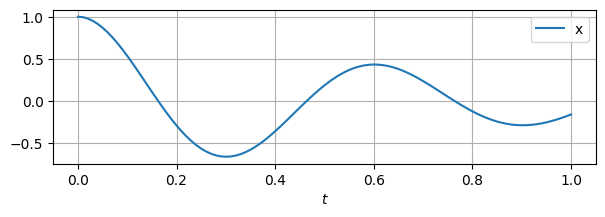

In [3]:
def plot_results(results):
    t = results.time
    x = results.outputs["Position.out_0"]

    plt.figure(figsize=(7, 2))

    plt.plot(t, x, label=f'x')

    plt.legend(loc='upper right')
    plt.xlabel("$t$")
    plt.grid()
    plt.show()

results = simulate(
    sim_context.diagram,
    sim_context.diagram.create_context(),
    (0.0, 1.0),
    recorded_signals=sim_context.recorded_signals,
    results_options=sim_context.results_options,
    options=sim_context.simulator_options,
)

plot_results(results)

## Changing model parameters

Although a Dashboard model can't be edited locally, we can still play around with the model parameters. For example we could change the damping parameter `b` in the above model and simulate the results locally or remotely. 

collimator.dashboard.project:INFO Loading model "Mass-Spring Damper"
collimator:WARNING Found unsupported parameters for Integrator: ['hold_trigger_method', 'reset_trigger_method'], they will be not be passed to the block constructor.
collimator:WARNING Found unsupported parameters for Integrator: ['hold_trigger_method', 'reset_trigger_method'], they will be not be passed to the block constructor.
collimator:INFO Simulation settings: SimulatorOptions(math_backend=auto, enable_tracing=True, max_major_step_length=0.01, max_major_steps=None, ode_solver_method=non-stiff, rtol=0.001, atol=1e-06, min_minor_step_size=0.0, max_minor_step_size=1000000.0, zc_bisection_loop_count=40, save_time_series=False, recorded_signals=7, return_context=False)
collimator:INFO Results settings: ResultsOptions(mode=<ResultsMode.auto: 0>, max_results_interval=None, fixed_results_interval=0.0)
collimator:INFO max_major_steps=198 based on smallest discrete period=0.01


collimator:INFO Simulator ready to start: SimulatorOptions(math_backend=jax, enable_tracing=True, max_major_step_length=0.01, max_major_steps=198, ode_solver_method=non-stiff, rtol=0.001, atol=1e-06, min_minor_step_size=0.0, max_minor_step_size=1000000.0, zc_bisection_loop_count=40, save_time_series=True, recorded_signals=7, return_context=False), Dopri5Solver(system=Diagram(root, 7 nodes), rtol=0.001, atol=1e-06, max_step_size=1000000.0, min_step_size=0.0, method='non-stiff', enable_autodiff=False)


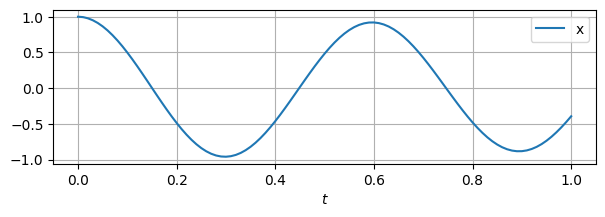

In [4]:
sim_context = project.get_model("Mass-Spring Damper")

context = sim_context.diagram.create_context()
context = context.with_parameters({"b": 1})

results = simulate(
    sim_context.diagram,
    context,
    (0.0, 1.0),
    recorded_signals=sim_context.recorded_signals,
    results_options=sim_context.results_options,
    options=sim_context.simulator_options,
)

plot_results(results)

For a remote simulation, you must set the parameters in the `simulate` call.

collimator.dashboard.project:INFO Waiting for simulation to complete...
collimator.dashboard.project:INFO Waiting for simulation to complete...
collimator.dashboard.project:INFO Waiting for simulation to complete...
collimator.dashboard.project:INFO Waiting for simulation to complete...
collimator.dashboard.project:INFO Waiting for simulation to complete...
collimator.dashboard.project:INFO {"level": "INFO", "message": "Simulation settings: SimulatorOptions(math_backend=auto, enable_tracing=True, max_major_step_length=0.01, max_major_steps=None, ode_solver_method=non-stiff, rtol=0.001, atol=1e-06, min_minor_step_size=0.0, max_minor_step_size=1000000.0, max_minor_steps_per_major_step=1000, zc_bisection_loop_count=40, save_time_series=False, recorded_signals=0, return_context=False)", "timestamp": 1711597721}
{"level": "INFO", "message": "Results settings: ResultsOptions(mode=<ResultsMode.auto: 0>, max_results_interval=0.0, fixed_results_interval=0.0)", "timestamp": 1711597721}
{"level":

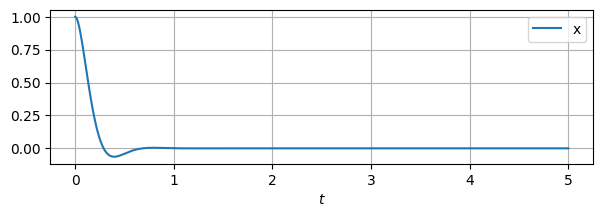

In [5]:
results = await dashboard.project.simulate(sim_context.model_uuid, parameters=[Parameter(name="b", value=50)])
plot_results(results)

## Upload a local model to the Dashboard

You can create a diagram using the `DiagramBuilder` and block classes, and then you can upload that model to your dashboard to use as any other model in your project. 

In [6]:
def make_diagram() -> DiagramBuilder:
    builder = DiagramBuilder()
    sine = builder.add(library.Sine(name="Sine"))
    integrator = builder.add(library.Integrator(0.0, name="Integrator"))
    builder.connect(sine.output_ports[0], integrator.input_ports[0])
    diagram = builder.build(name="SineIntegratorModel")
    return diagram

diagram = make_diagram()
project = dashboard.project.get_or_create_project("SineIntegratorProject")
model_uuid = project.save_model(diagram)

collimator.dashboard.project:INFO Creating project SineIntegratorProject...
collimator.dashboard.project:INFO Creating model 'SineIntegratorModel' (a38e8ad5-3185-4c11-a6cf-870b8893952d)


## Run a simulation remotely

Despite requiring a bit of code to run a simulation in the cloud and get results, the process from the API is very similar to the process in the Collimator application. If you don't need to change any simulation settings or model parameters, it really just takes one line of code, then you can do what you like with the results:

collimator.dashboard.project:INFO Waiting for simulation to complete...
collimator.dashboard.project:INFO Waiting for simulation to complete...
collimator.dashboard.project:INFO Waiting for simulation to complete...
collimator.dashboard.project:INFO Waiting for simulation to complete...
collimator.dashboard.project:INFO Waiting for simulation to complete...
collimator.dashboard.project:INFO Waiting for simulation to complete...
collimator.dashboard.project:INFO {"level": "INFO", "message": "Simulation settings: SimulatorOptions(math_backend=auto, enable_tracing=True, max_major_step_length=0.1, max_major_steps=None, ode_solver_method=non-stiff, rtol=0.001, atol=1e-06, min_minor_step_size=0.0, max_minor_step_size=1000000.0, max_minor_steps_per_major_step=4096, zc_bisection_loop_count=40, save_time_series=False, recorded_signals=0, return_context=False)", "timestamp": 1711597786}
{"level": "INFO", "message": "Results settings: ResultsOptions(mode=<ResultsMode.auto: 0>, max_results_interva

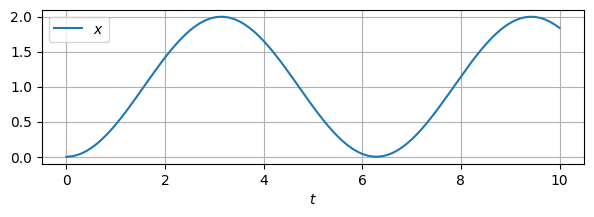

In [7]:
results = await dashboard.project.simulate(model_uuid)

t = results.time
x = results.outputs["Integrator.out_0"]

plt.figure(figsize=(7, 2))
plt.plot(t, x[:], label="$x$")
plt.legend()
plt.xlabel("$t$")
plt.grid()
plt.show()